# 분류
- 지도학습의 대표 유형 중 하나

### 앙상블
- 배깅(ex.랜덤포레스트)과 부스팅(ex. 그래디언트 부스팅, Lgbm,XGB)으로 나뉨
- 기본 알고리즘은 결정트리

### 결정트리
- if/else 기반
- 데이터의 피처를 기반으로 만들어진 결정노드에 따라 데이터를 분류 -> 리프노드에는 결정된 분류값이 들어감
- 많은 규칙이 생기면 이는 과적합으로 이어질수도 있음. 즉 트리의 깊이가 깊어지면 성능 저하
- 따라서 균일도(클래스의 섞인 정도가 적은....?)가 높은 데이터세트를 먼저 선택할 수 있게 규칙을 만듦
##### 지니계수
- 다양성이 낮을수록 균일도가 높으며, 지니계수가 1에 가까워질수록 균일도가 높은것
- 이를 기준으로 분할
##### 결정트리 파라미터
- min_samples_split: 노드 분할을 위한 최소한의 샘플 데이터 수
- min_samples_leaf: 리프노드가 되기 위한 최소한의 샘플 데이터 수
- max_features: 최대 피처 개수
- max_depth: 트리의 최대 깊이 규정
- max_leaf_nodes: 리프노드의 최대 개수

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names ,feature_names = iris_data.feature_names, impurity=True, filled=True)

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

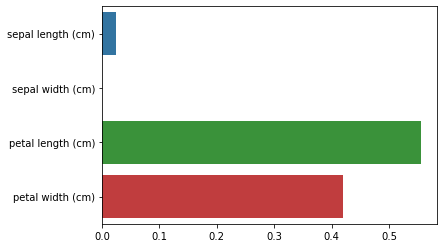

In [6]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)